In [5]:

import matplotlib.pyplot as plt
import numpy as np

%matplotlib widget
plt.ioff()

plt.rcParams.update(plt.rcParamsDefault)
px2inch = 1/plt.rcParams['figure.dpi']

def plot_sets(ax,gr=False,ti='',xla='',yla='',xli=False, yli=False,ticks_off=False,xticks_off=False,yticks_off=False, ba=False, ar=False,leg=False):
    
    ax.grid(gr)
    ax.set_title(ti)
    ax.set_xlabel(xla)
    ax.set_ylabel(yla)

    if   ticks_off==1: ax.set_xticklabels([]); ax.set_xticks([]);ax.set_yticklabels([]); ax.set_yticks([])
    elif ticks_off==2: ax.set_xticklabels([]); ax.set_xticks([])
    elif ticks_off==2: ax.set_yticklabels([]); ax.set_yticks([])

    if ba: ax.set_box_aspect(ba)
    if ar: ax.set_aspect(ar)

    if xli: ax.set_xlim(xli)
    if yli: ax.set_ylim(yli)

    if leg: ax.legend(**leg)


In [6]:

def get_C( C_lims= [0,1] ):
    fi   = np.random.rand()*2*np.pi
    M    = (C_lims[1]-C_lims[0]) * np.random.rand()  + C_lims[0]
    return M*( np.cos(fi) + 1j*np.sin(fi) )

def mandelbrot_iteration(N,C):
    
    Z    = np.full(N, np.nan, dtype=np.complex_)
    Z[0] = 0

    Z    = np.zeros(N, dtype=np.complex_)
     
    for i in range(N-1):
        Z[i+1] = Z[i]**2 + C
        if np.abs(Z[i])>=2:
           break
    return np.real(Z), np.imag(Z), C, i


def mandelbrot_iteration_C_dxy(N,C,C_dxy=1e-3):
    
    rnd  = 2*np.random.rand(2)-1
    C   += rnd[0]*C_dxy + 1j*rnd[1]*C_dxy 
    Z    = np.full(N, np.nan, dtype=np.complex_)
    Z[0] = 0

    for i in range(N-1):
        Z[i+1] = Z[i]**2 + C
        if np.abs(Z[i])>=2:
           break

    return np.real(Z), np.imag(Z), C, i

def distance_points(x,y):
    xy = np.hstack([x.reshape(-1,1),y.reshape(-1,1)])
    distance_P1_P2 = np.sqrt( np.sum(np.diff(xy,axis=0)**2,axis=1) )
    return distance_P1_P2

C0: -0.64072357 0.41712861*1j
C1: -1.01464576 -0.08801159*1j
C2: -0.64348379 0.41367435*1j
C3: -1.03881783 0.01948621*1j
C4: -0.08616383 -0.68465911*1j


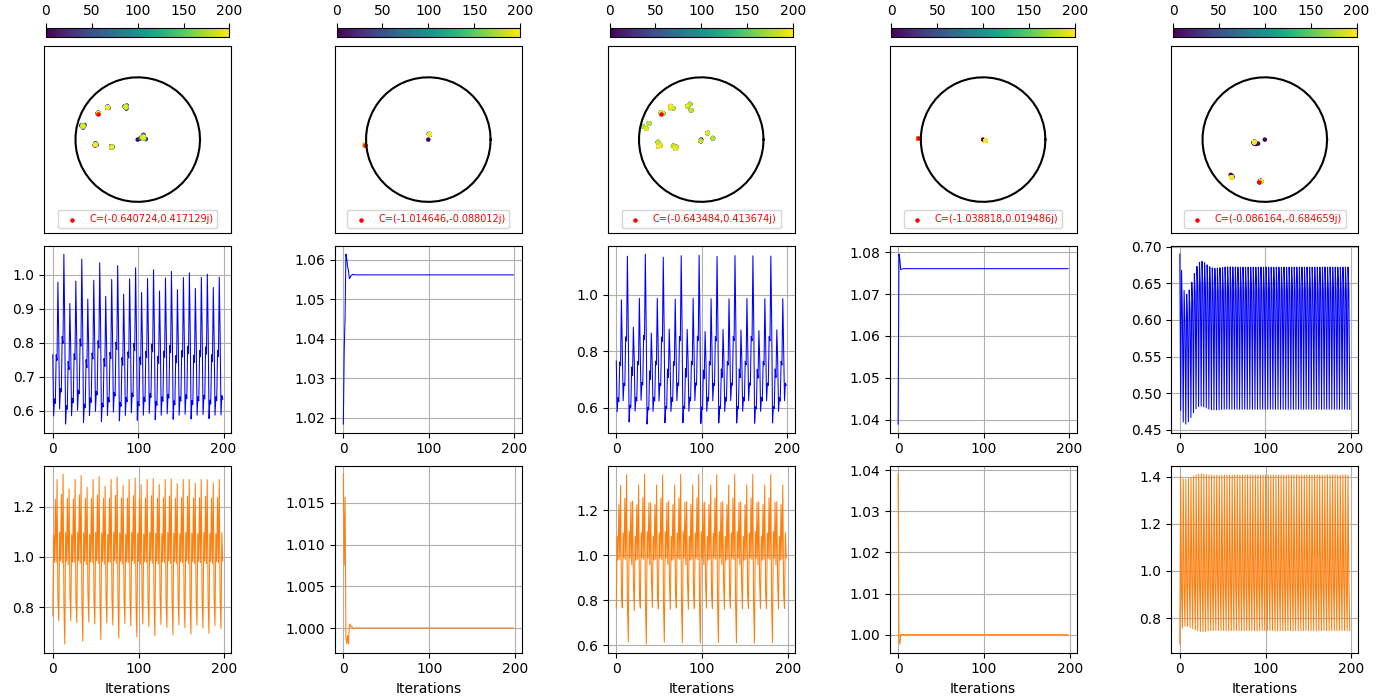

In [7]:


ncols   = 5
nrows   = 3
Nplots  = [nrows,ncols]
fig, ax = plt.subplots(Nplots[0],Nplots[1],figsize=(1400*px2inch ,700*px2inch),constrained_layout=True)
fig.canvas.header_visible = False
ax      = ax.flatten()
axlim   = [-1.5,1.5]
MS      = 5

theta = np.linspace(0,2*np.pi)
xc,yc  = np.cos(theta),np.sin(theta)
N      = 201
C_lims = [0.4,1.4]

for i in range(ncols):
    
    while True:
          x,y,C,iter     = mandelbrot_iteration(N,get_C(C_lims))
          distance_P1_P2 = distance_points(x,y)
          mean_dis       = np.mean(distance_P1_P2[-int(N/2):])
          estable        = N-2
          no_estable     = int(N/2)
          
          if iter>no_estable  and mean_dis>0.05:
             Cx,Cy = np.real(C),np.imag(C)
             ratio = distance_P1_P2[1:]/distance_P1_P2[:-1]
             print(f'C{i}: {Cx:0.8f} {Cy:0.8f}*1j')
             break

    # Row 1
    #######    
    # Unit Circle
    ax[i].plot(xc,yc,'k')
    
    # Iterations
    points = ax[i].scatter(x, y, s=MS, c=np.arange(N))
    fig.colorbar(points, ax=ax[i],location='top', shrink=0.7)

    # C point
    ax[i].scatter(Cx,Cy,s=MS,c='r',label=f'C=({Cx:0.6f},{Cy:0.6f}j)')
    plot_sets(ax[i],xli=axlim,yli=axlim,ba=1,ar=1,ticks_off=1,leg={'labelcolor':'linecolor','loc':8,'fontsize':7})
    
    # Row 2
    #######  
    ax[ncols+i].plot( distance_P1_P2  ,'b',lw=0.75)
    plot_sets(ax[ncols+i],gr=True, ba=1)

    # Row 3
    #######  
    ax[2*ncols+i].plot( ratio  ,'tab:orange',lw=0.75)
    plot_sets(ax[2*ncols+i],gr=True, ba=1,xla='Iterations')

plt.show()


C0: -0.72883711 0.13887200*1j
C1: -0.72691112 0.14761448*1j
C2: -0.72448184 0.14861251*1j
C3: -0.73455540 0.13773867*1j
C4: -0.72935332 0.15593881*1j


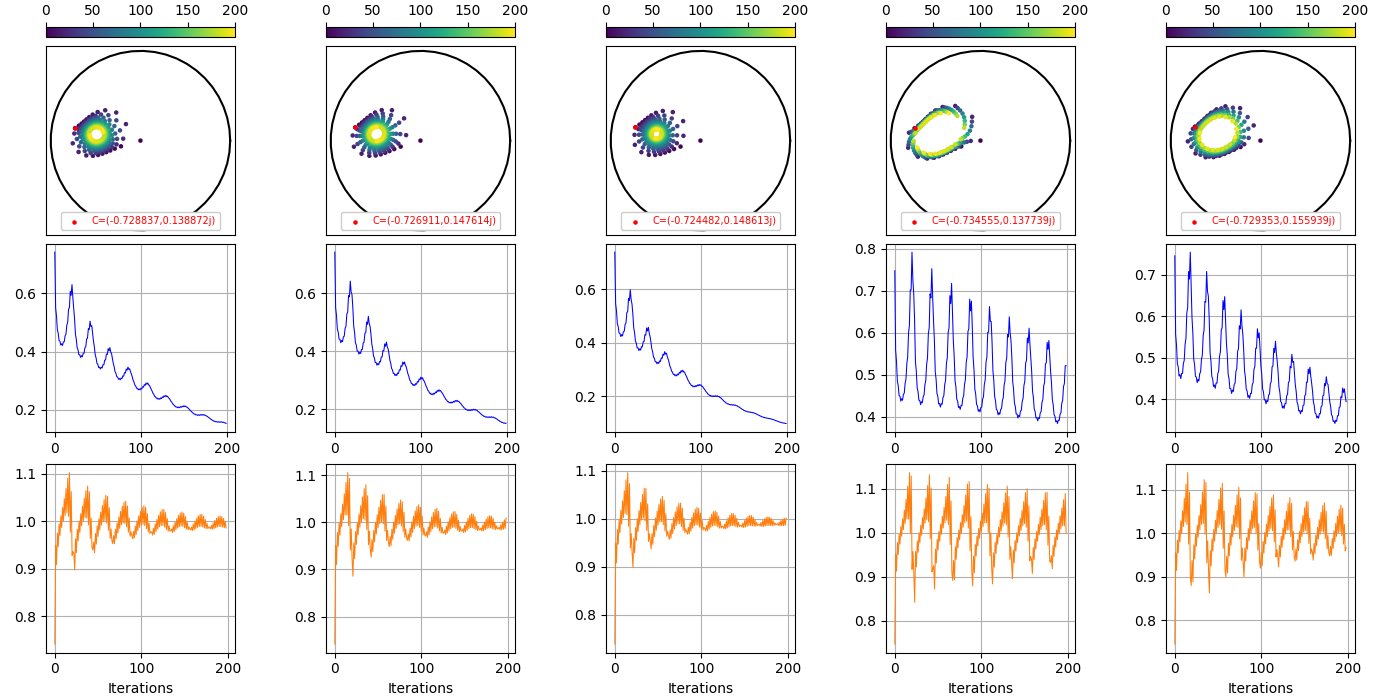

In [8]:


C_arr = [-0.72772108+0.14963497*1j,
         -0.68681531+0.29432931*1j,
         -0.08417608+0.64660606*1j]

ncols   = 5
nrows   = 3
Nplots  = [nrows,ncols]
fig, ax = plt.subplots(Nplots[0],Nplots[1],figsize=(1400*px2inch ,700*px2inch),constrained_layout=True)
fig.canvas.header_visible = False
ax      = ax.flatten()
MS      = 5
axlim   = [-1.05,1.05]


theta = np.linspace(0,2*np.pi)
xc,yc  = np.cos(theta),np.sin(theta)

N          = 201
C0         = -0.724567 + 0.146506*1j #get_C( C_lims )
estable    = N-2
no_estable = int(N/2)

for i in range(ncols):
    
    while True:

          C_dxy      = 0.01
          x,y,C,iter = mandelbrot_iteration_C_dxy(N, C0, C_dxy=C_dxy)
          distances  = distance_points(x,y)
          mean_dis   = np.mean(distances[-int(N/2):])
          
          if iter>no_estable  and mean_dis>0.05:
             Cx,Cy = np.real(C),np.imag(C)
             ratio = distances[1:]/distances[:-1]
             print(f'C{i}: {Cx:0.8f} {Cy:0.8f}*1j')
             break

    # Row 1
    #######    
    # Unit Circle
    ax[i].plot(xc,yc,'k')
    
    # Iterations
    points = ax[i].scatter(x, y, s=MS, c=np.arange(N))
    fig.colorbar(points, ax=ax[i],location='top', shrink=0.7)

    # C point
    ax[i].scatter(Cx,Cy,s=MS,c='r',label=f'C=({Cx:0.6f},{Cy:0.6f}j)')
    plot_sets(ax[i],xli=axlim,yli=axlim,ba=1,ar=1,ticks_off=1,leg={'labelcolor':'linecolor','loc':8,'fontsize':7,'framealpha':0.99})
    
    # Row 2
    #######  
    ax[ncols+i].plot( distances  ,'b',lw=0.75)
    plot_sets(ax[ncols+i],gr=True, ba=1)

    # Row 3
    #######  
    ax[2*ncols+i].plot( ratio  ,'tab:orange',lw=0.75)
    plot_sets(ax[2*ncols+i],gr=True, ba=1,xla='Iterations')

plt.show()
